# Hypothesis Testing

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy


In [41]:
#!pip install scipy

from scipy import stats

# One Sample t-test

### We will consider an experiment to assess the effects of a change in manufacturing procedure on the average potency of a tablet product. From the literature review it is found that average potency of drug is 5.01 m.g and considers it as a true process parameter. A new batch was made with modification of the usual manufacturing procedure. Twenty tablets were assayed and the results were collected.

In [3]:
one_sample = pd.read_excel("C:/Users/Neerav/Hiren Jupyter/onesample_ttest.xlsx")
one_sample.head()

,sample
0,5.13
1,4.98
2,5.20
3,5.08
4,4.99


In [25]:
one_sample['sample'].describe()

count    20.000000
mean      5.065500
std       0.080556
min       4.960000
25%       5.000000
50%       5.050000
75%       5.100000
max       5.240000
Name: sample, dtype: float64

In [128]:
# Assumption 1 - Normality of the Data

stats.shapiro(one_sample['sample'])

(0.9171460270881653, 0.08732303231954575)

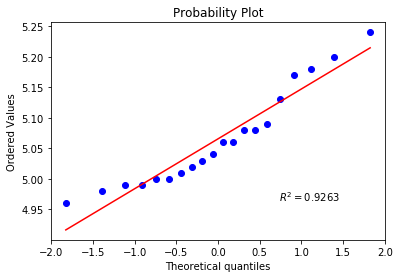

In [21]:
stats.probplot(one_sample['sample'], dist="norm", fit=True, rvalue=True, plot=plt);

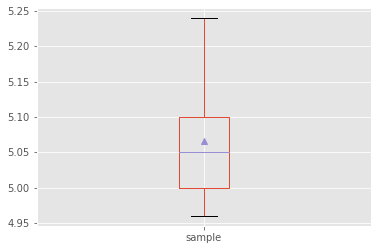

In [130]:
one_sample.boxplot(showmeans = True)

In [132]:
# Perform one sample t-test

stats.ttest_1samp(one_sample['sample'], popmean=5.01)

Ttest_1sampResult(statistic=3.0811443762178756, pvalue=0.006148006381330227)

## Interpretation

### From the table we can say that average potency of drug is 5.065 mg having standard deviation of 0.080556 The p-value corresponds to t-test is 0.006 which is less than 0.05 indicates that our hypothesis is rejected. It means average potency is significantly differing from assumed average potency 5.01 mg. Further the value of t-test (3.081) is greater than zero suggests that the average potency of given data is more than the assumed average potency. It helps us to take decision that modifying manufacturing process of drug is good compare to older one.

## Two Samples Independent t-test

### Data of HB is give for two groups i.e. Urban and Rural. Now you want to check statistically that is there any significant difference between these groups or not. 

### Use appropriate test along with graphical presentation.

In [60]:
data = pd.read_excel("C:/Users/Neerav/Hiren Jupyter/ttest.xlsx")
data.head()

,HB_Rural,HB_Urban
0,9.6,10.8
1,11.7,11.1
2,10.9,10.8
3,10.1,11.8
4,11.2,12.0


In [61]:
data.describe()

,HB_Rural,HB_Urban
count,42.000000,42.000000
mean,9.854286,10.202381
std,1.249455,1.334073
min,7.200000,6.400000
25%,9.125000,9.425000
50%,10.000000,10.200000
75%,10.850000,11.075000
max,12.000000,13.500000


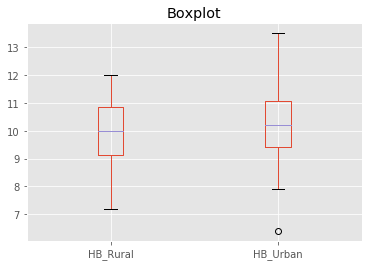

In [121]:
data.boxplot(['HB_Rural', 'HB_Urban'])
plt.title("Boxplot")
plt.style.use('ggplot')

In [69]:
# Assumption 1 = Variance across group must be equal 

equal_variance = stats.levene(data.HB_Rural, data.HB_Urban)
equal_variance

LeveneResult(statistic=0.13034328437563067, pvalue=0.7190048554424147)

In [78]:
# Assumption 2 = Data follows Normal Distribution 

rural_norm = stats.shapiro(data.HB_Rural)
rural_norm

(0.975081205368042, 0.4810384511947632)

In [79]:
urban_norm = stats.shapiro(data.HB_Urban)
urban_norm

(0.9876435995101929, 0.9240629076957703)

In [82]:
test = stats.ttest_ind(data.HB_Rural,data.HB_Urban,)
test

Ttest_indResult(statistic=-1.2342177754268655, pvalue=0.2206472671590388)

## Interpretation

### The p-value corresponds to t-test is 0.22 (more than 0.05), indicate that the average hemoglobin in percentage is same across both the groups. Further the value of t-test is -1.234, which is negative suggest that the average hemoglobin in percentage of women who live in rural area is less compare to women who live in urban area. But since, we are not able to reject Null hypothesis, we can not say the difference is significant. This may be due to chance.

# Paired t-test

### In practice many times observations are found in a pairs. For examples different types of items produced on same machine or study the effect of treatments pairs observations taken on respondent before giving treatment and after given treatment or observation taken from twins etc. In such cases this pairs of observations are intra-correlated with each other. 

### The objective of this test to study the effect of drugs on patient i.e. test the hypothesis. Average observations before giving treatment and average observations measured after giving treatment. To test this null hypothesis we use pair-t-test. 

### It has following assumptions:

1. There is high correlation between pairs of observations
2. Difference of pre-post observations are normally distributed (use K-S test)

In [110]:
pair = pd.read_csv("C:/Users/Neerav/Hiren Jupyter/pairedttest.csv")
pair.head()

,sr_no,Formulation_A,Marketed_Form_B
0,1,136,166
1,2,168,184
2,3,160,193
3,4,155,200
4,5,200,198


In [111]:
del pair['sr_no']

In [112]:
pair.head()

,Formulation_A,Marketed_Form_B
0,136,166
1,168,184
2,160,193
3,155,200
4,200,198


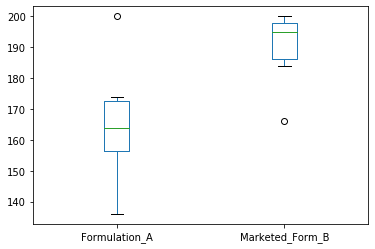

In [113]:
# Create box Plot of the Data

pair.boxplot(grid=False)

In [114]:
# Assumption - 1 Check Correlation betweem Pairs

pair.corr()

,Formulation_A,Marketed_Form_B
Formulation_A,1.000000,0.658079
Marketed_Form_B,0.658079,1.000000


In [115]:
# Assumption - 2 Check Normality of the data

stats.shapiro(pair.Formulation_A)

(0.9769113063812256, 0.9352151155471802)

In [116]:
stats.shapiro(pair.Marketed_Form_B)

(0.820210874080658, 0.08862417191267014)

In [117]:
# Perform paired t-test

stats.ttest_rel(pair.Formulation_A, pair.Marketed_Form_B)

Ttest_relResult(statistic=-3.672828639735495, pvalue=0.014400820938931375)

## Interpretation

### The p-value corresponds to Pair-t-test is 0.014 (<0.05) suggests that there is a significant difference between two formulation methods. The value corresponds to t statistic is -3.67 which is negative suggest that the average value of Formulation Method B is higher compare to Formulation method A. It means both Formulation methods are not identical. In the language of Pharmacy we say that both formulation methods are not bioequivalence.

# ANOVA

### Region wise salary is given. You want to see whether average salary across the all the region is same or statistically different. 

### Use appropriate statistical technique along with graphical presentation.

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [53]:
salary1 = pd.read_excel("C:/Users/Neerav/Hiren Jupyter/salary1.xlsx")
salary1.head()

,Region,salary
0,South,4.05
1,South,4.15
2,South,4.00
3,South,4.10
4,South,4.15


In [59]:
# Assumption 1 - Normality of the Data

# for South Region

stats.shapiro(salary1[salary1["Region"] == 'South'].salary)

(0.9020201563835144, 0.421151727437973)

In [60]:
# for Northeast region

stats.shapiro(salary1[salary1["Region"] == 'Northeast'].salary)

(0.9513880014419556, 0.7471006512641907)

In [62]:
# for West Region

stats.shapiro(salary1[salary1["Region"] == 'West'].salary)

(0.9427295327186584, 0.685295045375824)

In [ ]:
# Assumption 2 - Equality of Variance

In [63]:
stats.levene(salary1[salary1["Region"] == 'South'].salary,
            salary1[salary1["Region"] == 'Northeast'].salary,
            salary1[salary1["Region"] == 'West'].salary)

LeveneResult(statistic=0.27450980392156576, pvalue=0.7645901326494831)

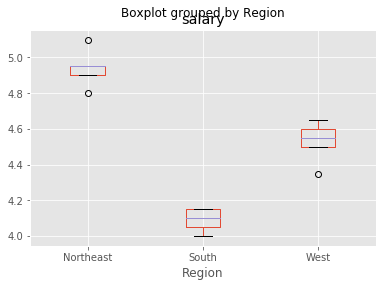

In [70]:
# Boxplot of the Data

salary1.boxplot(column = "salary", by = "Region");
plt.style.use('ggplot')
plt.show()

In [71]:
# Perform ANOVA

stats.f_oneway(salary1[salary1["Region"] == 'South'].salary,
            salary1[salary1["Region"] == 'Northeast'].salary,
            salary1[salary1["Region"] == 'West'].salary)

F_onewayResult(statistic=92.6666666666665, pvalue=5.056904642502212e-08)

## Interpretation

### From the p-value corresponds to F-test (ANOVA) is 0.000 (<0.05) suggest that the hypothesis of equality of mean salary of all three region are significantly different. Now our objective is to know which pairs significantly different. To achieve this objective we perform Post-Hoc Test for multiple comparisons. Here it is to note that variances of FEV across are statistical homogeneous therefore, we use Tukey’s multiple comparison test.

In [80]:
# Perform Pairwise comparison using Tukey HSD

MC = MultiComparison(salary1["salary"], salary1['Region'])
result = MC.tukeyhsd()

print(result)
print(MC.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj  lower   upper  reject
------------------------------------------------------
Northeast  South    -0.85 0.001 -1.0165 -0.6835   True
Northeast   West    -0.41 0.001 -0.5765 -0.2435   True
    South   West     0.44 0.001  0.2735  0.6065   True
------------------------------------------------------
['Northeast' 'South' 'West']
